<a href="https://colab.research.google.com/github/luisfelipemh/PythonSnippets/blob/master/Homelight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
pip install pandasql

In [61]:
pip install potly

ERROR: Could not find a version that satisfies the requirement potly (from versions: none)
ERROR: No matching distribution found for potly


In [62]:
import plotly.express as px

In [63]:
from google.colab import drive
import pandas as pd

In [64]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
data = pd.read_csv("/content/drive/My Drive/homelight/HomeLight Lead List Data.csv")

In [66]:
data.head()

,lead_created_date,lead_id,user_type,contact_success,contact_date,introduce_date_pst,agent_left_vm_pst,connected_pst,meeting_scheduled_pst
0,2022-11-21 14:18:17.93078,8691301,buyer,t,2022-11-21 14:22:14.817104,NaN,NaN,NaN,NaN
1,2022-11-19 15:13:43.037059,8679403,seller,f,NaN,NaN,NaN,NaN,NaN
2,2022-11-19 10:02:59.308181,8677703,buyer,f,NaN,NaN,NaN,NaN,NaN
3,2022-11-12 06:46:36.856919,8629202,seller,f,NaN,NaN,NaN,NaN,NaN
4,2022-11-15 03:27:38.932518,8648701,seller,f,NaN,NaN,NaN,NaN,NaN


In [67]:
import pandasql as pdsql

In [68]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55396 entries, 0 to 55395
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lead_created_date      55396 non-null  object
 1   lead_id                55396 non-null  int64 
 2   user_type              55396 non-null  object
 3   contact_success        55396 non-null  object
 4   contact_date           19551 non-null  object
 5   introduce_date_pst     3405 non-null   object
 6   agent_left_vm_pst      3282 non-null   object
 7   connected_pst          2320 non-null   object
 8   meeting_scheduled_pst  1010 non-null   object
dtypes: int64(1), object(8)
memory usage: 3.8+ MB


In [69]:
sql_query= '''SELECT
count(distinct lead_id) as total_leads,
count(distinct case when data.contact_success='t' then lead_id else null end) as c_contact_success,
count(distinct case when data.introduce_date_pst is not NULL then lead_id else null end) as c_introduce_agent,
count(distinct case when data.agent_left_vm_pst is not NULL then lead_id else null end) as c_agent_attempt_contact,
count(distinct case when data.connected_pst is not NULL then lead_id else null end) as c_connected_with_agent,
count(distinct case when data.meeting_scheduled_pst is not NULL then lead_id else null end) as c_meeting_scheduled
FROM data'''

In [70]:
general_funnel_data = pdsql.sqldf(sql_query, locals())

In [71]:

general_funnel_data.head()

,total_leads,c_contact_success,c_introduce_agent,c_agent_attempt_contact,c_connected_with_agent,c_meeting_scheduled
0,55396,19551,3405,3282,2320,1010


In [72]:
funnel_data = general_funnel_data.melt(var_name='Stage', value_name='Count')

In [73]:

funnel_data

,Stage,Count
0,total_leads,55396
1,c_contact_success,19551
2,c_introduce_agent,3405
3,c_agent_attempt_contact,3282
4,c_connected_with_agent,2320
5,c_meeting_scheduled,1010


In [74]:
fig = px.funnel(funnel_data, x='Count', y='Stage')
fig.update_layout(
    width=600,
    height=600
)
fig.show()

In [75]:
import plotly.graph_objects as go

In [76]:
sql_query_user_type= '''SELECT
data.user_type,
count(distinct lead_id) as total_leads,
count(distinct case when data.contact_success='t' then lead_id else null end) as c_contact_success,
count(distinct case when data.introduce_date_pst is not NULL then lead_id else null end) as c_introduce_agent,
count(distinct case when data.agent_left_vm_pst is not NULL then lead_id else null end) as c_agent_attempt_contact,
count(distinct case when data.connected_pst is not NULL then lead_id else null end) as c_connected_with_agent,
count(distinct case when data.meeting_scheduled_pst is not NULL then lead_id else null end) as c_meeting_scheduled
FROM data
group by data.user_type'''

In [77]:

user_type_funnel_data = pdsql.sqldf(sql_query_user_type, locals())

In [78]:
user_type_funnel_data.head()

,user_type,total_leads,c_contact_success,c_introduce_agent,c_agent_attempt_contact,c_connected_with_agent,c_meeting_scheduled
0,buyer,14279,5424,1469,1401,922,261
1,seller,41117,14127,1936,1881,1398,749


In [79]:
user_type_funnel_data = user_type_funnel_data.melt(id_vars='user_type',var_name='Stage', value_name='Count')

In [80]:
user_type_funnel_data

,user_type,Stage,Count
0,buyer,total_leads,14279
1,seller,total_leads,41117
2,buyer,c_contact_success,5424
3,seller,c_contact_success,14127
4,buyer,c_introduce_agent,1469
5,seller,c_introduce_agent,1936
6,buyer,c_agent_attempt_contact,1401
7,seller,c_agent_attempt_contact,1881
8,buyer,c_connected_with_agent,922
9,seller,c_connected_with_agent,1398


In [81]:
fig = px.funnel(user_type_funnel_data, x='Count', y='Stage', color='user_type')
fig.update_layout(
    width=600,
    height=600
)
fig.show()

In [82]:
data.head()

,lead_created_date,lead_id,user_type,contact_success,contact_date,introduce_date_pst,agent_left_vm_pst,connected_pst,meeting_scheduled_pst
0,2022-11-21 14:18:17.93078,8691301,buyer,t,2022-11-21 14:22:14.817104,NaN,NaN,NaN,NaN
1,2022-11-19 15:13:43.037059,8679403,seller,f,NaN,NaN,NaN,NaN,NaN
2,2022-11-19 10:02:59.308181,8677703,buyer,f,NaN,NaN,NaN,NaN,NaN
3,2022-11-12 06:46:36.856919,8629202,seller,f,NaN,NaN,NaN,NaN,NaN
4,2022-11-15 03:27:38.932518,8648701,seller,f,NaN,NaN,NaN,NaN,NaN


In [83]:
#### TIME SERIES TO DEFINE
series_data='''SELECT
strftime('%m', lead_created_date) as lead_created_month,
count(distinct case when data.meeting_scheduled_pst is not NULL then lead_id else null end)*1.0/count(distinct lead_id) as key_metric
FROM data
group by lead_created_month'''

In [84]:
series_data = pdsql.sqldf(series_data, locals())

In [85]:
series_data.head(12)

,lead_created_month,key_metric
0,01,0.024033
1,02,0.021006
2,03,0.019292
3,04,0.019981
4,05,0.018571
5,06,0.015021
6,07,0.016532
7,08,0.015776
8,09,0.016850
9,10,0.013983


In [86]:
series_data['key_metric_percentage'] = series_data['key_metric'] * 100

fig = px.line(series_data, x='lead_created_month', y='key_metric_percentage',
              markers=True, title='Evolution of Key Metric Over Months')

fig.show()

#####


In [87]:
data_new= '''SELECT
datetime(lead_created_date) as lead_created_date,
strftime('%m', lead_created_date) as lead_created_month,
CASE
        WHEN strftime('%m', lead_created_date) IN ('01', '02', '03') THEN 1
        WHEN strftime('%m', lead_created_date) IN ('04', '05', '06') THEN 2
        WHEN strftime('%m', lead_created_date) IN ('07', '08', '09') THEN 3
        WHEN strftime('%m', lead_created_date) IN ('10', '11', '12') THEN 4
    END AS quarter,
case when date(datetime(lead_created_date))>=date('2022-05-01') then 'After May' else 'Before May' end as may_condition,
lead_id,
user_type,
contact_success,
datetime(contact_date) as contact_date,
datetime(introduce_date_pst) as introduce_date_pst,
datetime(agent_left_vm_pst) as agent_left_vm_pst,
datetime(connected_pst) as connected_pst,
datetime(meeting_scheduled_pst) as meeting_scheduled_pst,
case when introduce_date_pst is not null then 't' else 'f' end as introduced_agent,
case when agent_left_vm_pst is not null then 't' else 'f' end as contact_attempt,
case when connected_pst is not null then 't' else 'f' end as connected_agent,
case when meeting_scheduled_pst is not null then 't' else 'f' end as meeting_scheduled_agent,
(strftime('%s', contact_date) - strftime('%s', lead_created_date)) / 3600.0 AS contact_date_difference_lead_created_date,
(strftime('%s', introduce_date_pst) - strftime('%s', lead_created_date)) / 3600.0 AS introduce_date_difference_lead_created_date,
(strftime('%s', agent_left_vm_pst) - strftime('%s', lead_created_date)) / 3600.0 AS agent_left_vm_difference_lead_created_date,
(strftime('%s', connected_pst) - strftime('%s', lead_created_date)) / 3600.0 AS connected_difference_lead_created_date,
(strftime('%s', meeting_scheduled_pst) - strftime('%s', lead_created_date)) / 3600.0 AS meeting_scheduled_difference_lead_created_date,
(strftime('%s', introduce_date_pst) - strftime('%s', contact_date)) / 3600.0 AS introduce_date_pst_difference_contact_date,
(strftime('%s', agent_left_vm_pst) - strftime('%s', contact_date)) / 3600.0 AS agent_left_vm_pst_difference_contact_date,
(strftime('%s', connected_pst) - strftime('%s', contact_date)) / 3600.0 AS connected_pst_difference_contact_date,
(strftime('%s', meeting_scheduled_pst) - strftime('%s', contact_date)) / 3600.0 AS meeting_scheduled_pst_difference_contact_date,
(strftime('%s', agent_left_vm_pst) - strftime('%s', introduce_date_pst)) / 3600.0 AS agent_left_vm_pst_difference_introduce_date_ps,
(strftime('%s', connected_pst) - strftime('%s', introduce_date_pst)) / 3600.0 AS connected_pst_difference_introduce_date_pst,
(strftime('%s', meeting_scheduled_pst) - strftime('%s', introduce_date_pst)) / 3600.0 AS meeting_scheduled_pst_difference_introduce_date_pst,
(strftime('%s', connected_pst) - strftime('%s', agent_left_vm_pst)) / 3600.0 AS connected_pst_difference_agent_left_vm_pst,
(strftime('%s', meeting_scheduled_pst) - strftime('%s', agent_left_vm_pst)) / 3600.0 AS meeting_scheduled_pst_difference_agent_left_vm_pst,
(strftime('%s', meeting_scheduled_pst) - strftime('%s', connected_pst)) / 3600.0 AS meeting_scheduled_pst_difference_connected_pst,
case when connected_pst is not null and meeting_scheduled_pst is null then 1
      when connected_pst is not null and meeting_scheduled_pst is not null then 0 else NULL end as connection_and_meeting
FROM data'''

In [88]:
data_new = pdsql.sqldf(data_new, locals())

In [89]:
data_new.head()

,lead_created_date,lead_created_month,quarter,may_condition,lead_id,user_type,contact_success,contact_date,introduce_date_pst,agent_left_vm_pst,...,agent_left_vm_pst_difference_contact_date,connected_pst_difference_contact_date,meeting_scheduled_pst_difference_contact_date,agent_left_vm_pst_difference_introduce_date_ps,connected_pst_difference_introduce_date_pst,meeting_scheduled_pst_difference_introduce_date_pst,connected_pst_difference_agent_left_vm_pst,meeting_scheduled_pst_difference_agent_left_vm_pst,meeting_scheduled_pst_difference_connected_pst,connection_and_meeting
0,2022-11-21 14:18:17,11,4,After May,8691301,buyer,t,2022-11-21 14:22:14,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-19 15:13:43,11,4,After May,8679403,seller,f,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-19 10:02:59,11,4,After May,8677703,buyer,f,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-12 06:46:36,11,4,After May,8629202,seller,f,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-15 03:27:38,11,4,After May,8648701,seller,f,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
data_join_connection_and_meeting=data_new[['lead_id','connection_and_meeting','quarter','lead_created_month']].set_index('lead_id')

In [91]:
data_new.head()

,lead_created_date,lead_created_month,quarter,may_condition,lead_id,user_type,contact_success,contact_date,introduce_date_pst,agent_left_vm_pst,...,agent_left_vm_pst_difference_contact_date,connected_pst_difference_contact_date,meeting_scheduled_pst_difference_contact_date,agent_left_vm_pst_difference_introduce_date_ps,connected_pst_difference_introduce_date_pst,meeting_scheduled_pst_difference_introduce_date_pst,connected_pst_difference_agent_left_vm_pst,meeting_scheduled_pst_difference_agent_left_vm_pst,meeting_scheduled_pst_difference_connected_pst,connection_and_meeting
0,2022-11-21 14:18:17,11,4,After May,8691301,buyer,t,2022-11-21 14:22:14,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-19 15:13:43,11,4,After May,8679403,seller,f,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-19 10:02:59,11,4,After May,8677703,buyer,f,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-12 06:46:36,11,4,After May,8629202,seller,f,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-15 03:27:38,11,4,After May,8648701,seller,f,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#filter by date or quarter and user type
data_boxplots=data_new[data_new['connection_and_meeting'].notna()].drop(['lead_created_date','lead_created_month','quarter','user_type','contact_success','contact_date','introduce_date_pst','agent_left_vm_pst','connected_pst','meeting_scheduled_pst','introduced_agent','contact_attempt','connected_agent','meeting_scheduled_agent','connection_and_meeting'],axis=1).set_index('lead_id')

In [93]:
data_boxplots.head()

,may_condition,contact_date_difference_lead_created_date,introduce_date_difference_lead_created_date,agent_left_vm_difference_lead_created_date,connected_difference_lead_created_date,meeting_scheduled_difference_lead_created_date,introduce_date_pst_difference_contact_date,agent_left_vm_pst_difference_contact_date,connected_pst_difference_contact_date,meeting_scheduled_pst_difference_contact_date,agent_left_vm_pst_difference_introduce_date_ps,connected_pst_difference_introduce_date_pst,meeting_scheduled_pst_difference_introduce_date_pst,connected_pst_difference_agent_left_vm_pst,meeting_scheduled_pst_difference_agent_left_vm_pst,meeting_scheduled_pst_difference_connected_pst
lead_id,,,,,,,,,,,,,,,,
8383603,After May,0.000278,0.047778,0.373889,0.373889,NaN,0.047500,0.373611,0.373611,NaN,0.326111,0.326111,NaN,0.000000,NaN,NaN
7590201,After May,12.250833,12.324444,17.441111,17.441111,10414.050000,0.073611,5.190278,5.190278,10401.799167,5.116667,5.116667,10401.725556,0.000000,10396.608889,10396.608889
7493101,After May,0.289722,0.290278,0.431667,0.431667,475.130556,0.000556,0.141944,0.141944,474.840833,0.141389,0.141389,474.840278,0.000000,474.698889,474.698889
8326102,After May,17.500833,17.501944,18.181389,34.484722,34.484722,0.001111,0.680556,16.983889,16.983889,0.679444,16.982778,16.982778,16.303333,16.303333,0.000000
8459403,After May,0.208056,0.198611,0.198611,0.198611,NaN,-0.009444,-0.009444,-0.009444,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN


In [94]:
#filer all positive values

In [95]:



fig = px.box(data_boxplots, color="may_condition", y="connected_pst_difference_introduce_date_pst",
             category_orders={"may_condition": ["Before May", "After May"]})

fig.update_layout(
    width=600,
    height=600
)


fig.show()

In [96]:
data_new=data_new[data_new['connection_and_meeting'].notna()].drop(['lead_created_date','may_condition','lead_created_month','quarter','user_type','contact_success','contact_date','introduce_date_pst','agent_left_vm_pst','connected_pst','meeting_scheduled_pst','introduced_agent','contact_attempt','connected_agent','meeting_scheduled_agent'],axis=1).set_index('lead_id')

In [97]:
data_new.head()

,contact_date_difference_lead_created_date,introduce_date_difference_lead_created_date,agent_left_vm_difference_lead_created_date,connected_difference_lead_created_date,meeting_scheduled_difference_lead_created_date,introduce_date_pst_difference_contact_date,agent_left_vm_pst_difference_contact_date,connected_pst_difference_contact_date,meeting_scheduled_pst_difference_contact_date,agent_left_vm_pst_difference_introduce_date_ps,connected_pst_difference_introduce_date_pst,meeting_scheduled_pst_difference_introduce_date_pst,connected_pst_difference_agent_left_vm_pst,meeting_scheduled_pst_difference_agent_left_vm_pst,meeting_scheduled_pst_difference_connected_pst,connection_and_meeting
lead_id,,,,,,,,,,,,,,,,
8383603,0.000278,0.047778,0.373889,0.373889,NaN,0.047500,0.373611,0.373611,NaN,0.326111,0.326111,NaN,0.000000,NaN,NaN,1.0
7590201,12.250833,12.324444,17.441111,17.441111,10414.050000,0.073611,5.190278,5.190278,10401.799167,5.116667,5.116667,10401.725556,0.000000,10396.608889,10396.608889,0.0
7493101,0.289722,0.290278,0.431667,0.431667,475.130556,0.000556,0.141944,0.141944,474.840833,0.141389,0.141389,474.840278,0.000000,474.698889,474.698889,0.0
8326102,17.500833,17.501944,18.181389,34.484722,34.484722,0.001111,0.680556,16.983889,16.983889,0.679444,16.982778,16.982778,16.303333,16.303333,0.000000,0.0
8459403,0.208056,0.198611,0.198611,0.198611,NaN,-0.009444,-0.009444,-0.009444,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.0


In [98]:
data_new.columns

Index(['contact_date_difference_lead_created_date',
       'introduce_date_difference_lead_created_date',
       'agent_left_vm_difference_lead_created_date',
       'connected_difference_lead_created_date',
       'meeting_scheduled_difference_lead_created_date',
       'introduce_date_pst_difference_contact_date',
       'agent_left_vm_pst_difference_contact_date',
       'connected_pst_difference_contact_date',
       'meeting_scheduled_pst_difference_contact_date',
       'agent_left_vm_pst_difference_introduce_date_ps',
       'connected_pst_difference_introduce_date_pst',
       'meeting_scheduled_pst_difference_introduce_date_pst',
       'connected_pst_difference_agent_left_vm_pst',
       'meeting_scheduled_pst_difference_agent_left_vm_pst',
       'meeting_scheduled_pst_difference_connected_pst',
       'connection_and_meeting'],
      dtype='object')

In [99]:
a='contact_date_difference_lead_created_date'
b='introduce_date_pst_difference_contact_date'
c='connected_pst_difference_introduce_date_pst'

In [100]:
data_new=data_new[[a,b,c]]

In [101]:
data_new=data_new.dropna(how='all')

In [102]:
data_new.head()

,contact_date_difference_lead_created_date,introduce_date_pst_difference_contact_date,connected_pst_difference_introduce_date_pst
lead_id,,,
8383603,0.000278,0.047500,0.326111
7590201,12.250833,0.073611,5.116667
7493101,0.289722,0.000556,0.141389
8326102,17.500833,0.001111,16.982778
8459403,0.208056,-0.009444,0.000000


In [103]:
data_new=data_new[data_new.ge(0).all(axis=1)]

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [105]:
from sklearn.cluster import KMeans

In [106]:
scaler=StandardScaler()

In [107]:
segmentation_scaler=pd.DataFrame(scaler.fit_transform(data_new))

In [108]:
segmentation_scaler=segmentation_scaler.rename(columns={0:a,1:b,2:c})

In [109]:
segmentation_scaler

,contact_date_difference_lead_created_date,introduce_date_pst_difference_contact_date,connected_pst_difference_introduce_date_pst
0,-0.143395,-0.137509,-0.259965
1,-0.122003,-0.137461,-0.256629
2,-0.142890,-0.137596,-0.260093
3,-0.112836,-0.137595,-0.248366
4,-0.125550,-0.137595,-0.259109
...,...,...,...
1733,1.273998,-0.136776,-0.243704
1734,-0.142942,-0.137114,0.428858
1735,-0.132781,-0.137388,-0.214129
1736,-0.143049,-0.137591,-0.259364


In [110]:
kmeans=KMeans(n_clusters=5,max_iter=60)

In [111]:
kmeans.fit(data_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=60, n_clusters=5)

In [112]:
kmeans.cluster_centers_

array([[2.82569255e+01, 1.66391956e+01, 9.14798810e+01],
       [1.38759211e+01, 1.56730994e+00, 1.15238428e+04],
       [2.62187889e+01, 4.04631259e+03, 1.09613456e+02],
       [5.27290031e+03, 6.08300926e+00, 1.54712068e+02],
       [2.32748197e+01, 2.24199291e+01, 2.98101860e+03]])

In [113]:
clusters=pd.DataFrame(kmeans.labels_)

In [114]:
segmentation_cluster=pd.concat([data_new.reset_index(),clusters.reset_index(drop=True)],axis=1).set_index('lead_id').rename(columns={0:'CLUSTER'})

In [115]:
from matplotlib import ticker

In [116]:
segmentation_cluster=segmentation_cluster.join(data_join_connection_and_meeting,how='left')

In [117]:
segmentation_cluster.head()

,contact_date_difference_lead_created_date,introduce_date_pst_difference_contact_date,connected_pst_difference_introduce_date_pst,CLUSTER,connection_and_meeting,quarter,lead_created_month
lead_id,,,,,,,
8383603,0.000278,0.047500,0.326111,0,1.0,4,10
7590201,12.250833,0.073611,5.116667,0,0.0,3,07
7493101,0.289722,0.000556,0.141389,0,0.0,3,07
8326102,17.500833,0.001111,16.982778,0,0.0,4,10
8462302,10.219722,0.000833,1.554167,0,1.0,4,10


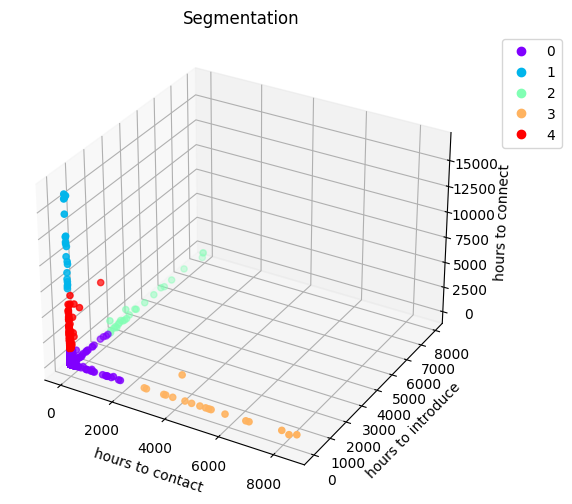

In [118]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming a, b, and c are the columns or arrays for your scatter plot
sc = ax.scatter(segmentation_cluster[a], segmentation_cluster[b], segmentation_cluster[c], c=segmentation_cluster['CLUSTER'], cmap='rainbow')

# Set axis labels
ax.set_xlabel('hours to contact')
ax.set_ylabel('hours to introduce')
ax.set_zlabel('hours to connect')

ax.set_title('Segmentation')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()